# 1D
Wave equation for $A(x,t)$:
$$ \partial^2_t A= c^2 \partial^2_x A$$
$ x \in [0,X] $, $t \in [0,T]$. Initial conditions:
$$ A(x,0)=I(x)$$
$$ \partial_t A(x,0)=0$$ 
Boundary conditions:
$$ A(0,t)=0$$
$$ A(X,t)=0$$
Replace pde with central differences
$$ \frac{A^{n+1}_i -2 A^n_i+A^{n-1}_i}{\Delta t^2} = c^2 \frac{A^n_{i+1} -2 A^n_i+A^n_{i-1}}{\Delta x^2} $$
$$ A^{n+1}_i = 2A^n_i - A^{n-1}_i + c^2 \frac{\Delta t^2}{\Delta x^2} (A^n_{i+1} -2 A^n_i+A^n_{i-1}) $$
for $n= 1...N-1$ ($A^0$ and $A^N$ are set by boundary conditions). Set $C^2=c^2 \frac{\Delta t^2}{\Delta x^2}$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.style.use('ggplot')

In [2]:
#set up time and space discretisation
T=1.0
NT=500
dt=T/NT
tspace=np.linspace(0,T,NT+1)

X=1.0
NX=100
xspace=np.linspace(0,X,NX+1)
dx=X/NX

In [3]:
#problem set up
c=2.0
C2=c**2*dt**2/dx**2
print C2

#initial condition function
I=lambda x: 0*x #-0.5*x*(x-X)*(x-0.5*X)

#initialise A_1 and A_2, the first and second previous timesteps
A_1=I(xspace) #initial condition
A_2=np.zeros(NX+1) #encodes A'=0 condition

#boundary conditions
A0=lambda t: 1.0*np.sin(20*np.pi*t)
AX=lambda t: 0*t

plt.plot(xspace,A_1)
plt.show

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-3-ffc943185555>, line 4)

In [19]:
#update
Avalues=A_1
A=np.zeros(NX+1)
for t in tspace:
    A[1:NX]=2*A_1[1:NX]-A_2[1:NX]+C2*(A_1[2:NX+1]-2*A_1[1:NX]+A_1[0:NX-1])
    A[0]=A0(t)
    A[NX]=AX(t)
    
    Avalues=np.vstack((Avalues,A))
    
    A_2=A_1
    A_1=A

0
0
50
100
150
200
250
300
350
400
450


0


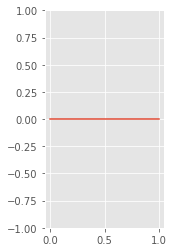

In [20]:
fig, ax = plt.subplots(1)
ax.set_aspect(1.)
ax.set_title('1D wave', fontsize=12)

#initial plot
wave=ax.plot(xspace,Avalues[0])
ymin,ymax=-1, 1 #plt.ylim()

#function to update plot
def animate(i):
    if i%50==0:
        print i
    ax.clear()
    plt.ylim((ymin,ymax))
    wave=ax.plot(xspace,Avalues[i])
    return wave,
    
anim = FuncAnimation(
    fig, animate, interval=100, frames=len(tspace)-1)

HTML(anim.to_html5_video())

# 2D

Rectangluar grid. Wave equation for $A(x,y,t)$:
$$ \partial^2_t A= c^2( \partial^2_x A \partial^2_y A)$$
$ x \in [0,X] $, $y\in [0,Y]$, $t \in [0,T]$. Initial conditions:
$$ A(x,y,0)=I(x,y)$$
$$ \partial_t A(x,y,0)=0$$ 
Boundary conditions:
$$ A(0,y,t)=0$$
$$ A(X,y,t)=0$$
$$ A(x,0,t)=0$$
$$ A(x,Y,t)=0$$

